# Exploratory Data Analysis on Lending Club Case Study

##### Group Member :
   1. Himanshu Kumar (Individual)

### Business Objective :
    To find out the driving factors behind loan default.Which will help an organisation to look for specific variables which       contributes to default.
    

### Exploratory Data Analysis:

    We have been shared dataset consists of loan data from Lending Club.

### Assumption:
    Dataset comprises of below loan_status :
 
    Fully Paid : Non Defaulter
    Current : It may go default or non-Default -> So we need to drop from our dataset
    Charged Off : Customers have stopped paying installments for long terms, hence they moved to defaulter.

We can begin with importing all required libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")

Loading raw dataset of loan for our case study

In [217]:
loan_raw_df = pd.read_csv("loan.csv", low_memory=False)

In [220]:
#Previewing the dataset with 5 records
loan_raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
raw_data_rows = loan_raw_df.shape[0]
print('No. of rows in loan dataset : ',loan_raw_df.shape[0])
raw_data_col = loan_raw_df.shape[1]
print('No. of columns in loan dataset : ',loan_raw_df.shape[1])

No. of rows in loan dataset :  39717
No. of columns in loan dataset :  111


In [9]:
loan_raw_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Observing Loan dataset closely we can see there are 111 columns available. Since we will be analyzing variables which is related before loan is approved. For now we can ignore rest of the data.

In [221]:
# Code for retaining only customer demographic and loan attributes.
variable_list = ['emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'issue_d',
'term',
'installment'
];

# Contains list of columns to be deleted, which we dont need for our analysis any more
variable_to_del = [x for x in loan_raw_df.columns if x not in variable_list]

for i in variable_to_del:
    loan_raw_df = loan_raw_df.drop(i, axis=1)

In [222]:
# Now we have only columns avilable in dataframe which we need for analysis as shown below
loan_raw_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


Now we will filter raw dataset for loan_status="Fully Paid" & "Current" and store it a new dataframe called loan_default_df

In [226]:
# As of now we have removed unwanted columns.Now we need to remove rows with loan status as "Current"

loan_default_df = loan_raw_df[loan_raw_df.loan_status != 'Current' ]
loan_default_df = loan_default_df[~loan_default_df.emp_title.isnull()]

### % of rows remaining after removing Current loan status

In [227]:
print('% of rows removed',round(((raw_data_rows-loan_default_df.shape[0])/raw_data_rows)*100,2))

% of rows removed 8.88


### Columnwise % of null 

In [228]:
round(((loan_default_df.isnull().sum()/loan_default_df.shape[0])*100),2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              0.00
emp_length             0.15
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

### Below we can see there is some issue with data types eg.int_rate is Object type instead of float

In [229]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36191 entries, 1 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36191 non-null  int64  
 1   funded_amnt          36191 non-null  int64  
 2   funded_amnt_inv      36191 non-null  float64
 3   term                 36191 non-null  object 
 4   int_rate             36191 non-null  object 
 5   installment          36191 non-null  float64
 6   grade                36191 non-null  object 
 7   sub_grade            36191 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           36136 non-null  object 
 10  home_ownership       36191 non-null  object 
 11  annual_inc           36191 non-null  float64
 12  verification_status  36191 non-null  object 
 13  issue_d              36191 non-null  object 
 14  loan_status          36191 non-null  object 
 15  purpose              36191 non-null 

In [235]:
loan_default_df["int_rate"] = loan_default_df.int_rate.apply(lambda x : x.replace("%","")).astype("float")


We can see below now int_rate datatype is changed to float , also % symbol has been removed

In [237]:
loan_default_df["int_rate"].head()

1    15.27
3    13.49
5     7.90
6    15.96
7    18.64
Name: int_rate, dtype: float64

Let's take a look at the values of Categorical columns

In [238]:
loan_default_df.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [239]:
loan_default_df.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [240]:
loan_default_df.grade.unique()

array(['C', 'A', 'E', 'B', 'D', 'F', 'G'], dtype=object)

In [241]:
loan_default_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [242]:
loan_default_df.purpose.unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [243]:
loan_default_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35


In [244]:
loan_default_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length             55
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
dtype: int64

Now we will work on emp_length column and derive a new categorical column named as job_rank.
<br>
**Assumption : emp_length <3 is Entry-Level, between 3 and 7 is Mid-Level and greater than 7 is Senior Level**


Below are the steps, we will follow to derive job_rank column
    Extract digits from the source string
    Remove rows where emp_length is blank
    Convert emp_length data type to integer to make categorical variable 

In [245]:
# Extract digits from the source string
loan_default_df.loc[:,'emp_length'] = loan_default_df['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x))))).copy()


In [246]:
#Remove rows where emp_length is blank
loan_default_df = loan_default_df[loan_default_df['emp_length'] != ""]
loan_default_df.shape

(36136, 18)

In [247]:
#Convert emp_length data type to integer
loan_default_df.loc[:,'emp_length'] = loan_default_df['emp_length'].astype("int32").copy()

In [248]:
#emp_length <3 is Entry-Level, between 3 and 7 is Mid-Level and greater than 7 is Senior Level

def job_rank(exp):
    if exp <=3:
        return 'Entry-Level'
    elif (exp >3 and exp<=7):
        return 'Mid-Level'
    else:
        return 'Senior-Level'
    
loan_default_df['job_rank'] = loan_default_df.emp_length.apply(lambda x : job_rank(x))    

Below we can see a new column job_rank has been added to loan_default_df dataframe

In [249]:
loan_default_df.job_rank

1         Entry-Level
3        Senior-Level
5         Entry-Level
6        Senior-Level
7        Senior-Level
             ...     
39710     Entry-Level
39711       Mid-Level
39712       Mid-Level
39713     Entry-Level
39716     Entry-Level
Name: job_rank, Length: 36136, dtype: object

If we look at below meta data information, we will notice issue_d date field is showing "Object" dtype instead of datetime. In order to extract month or year from a date field we need to convert field dtype from "object" to "datetime"

In [250]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 1 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36136 non-null  int64  
 1   funded_amnt          36136 non-null  int64  
 2   funded_amnt_inv      36136 non-null  float64
 3   term                 36136 non-null  object 
 4   int_rate             36136 non-null  float64
 5   installment          36136 non-null  float64
 6   grade                36136 non-null  object 
 7   sub_grade            36136 non-null  object 
 8   emp_title            36136 non-null  object 
 9   emp_length           36136 non-null  int32  
 10  home_ownership       36136 non-null  object 
 11  annual_inc           36136 non-null  float64
 12  verification_status  36136 non-null  object 
 13  issue_d              36136 non-null  object 
 14  loan_status          36136 non-null  object 
 15  purpose              36136 non-null 

In [251]:
loan_default_df.loc[:,'issue_d'] = pd.to_datetime(loan_default_df.issue_d, format='%b-%y')

In [252]:
loan_default_df['issue_year'] = loan_default_df['issue_d'].dt.year

loan_default_df['issue_month'] = loan_default_df['issue_d'].dt.month

In [253]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 1 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            36136 non-null  int64         
 1   funded_amnt          36136 non-null  int64         
 2   funded_amnt_inv      36136 non-null  float64       
 3   term                 36136 non-null  object        
 4   int_rate             36136 non-null  float64       
 5   installment          36136 non-null  float64       
 6   grade                36136 non-null  object        
 7   sub_grade            36136 non-null  object        
 8   emp_title            36136 non-null  object        
 9   emp_length           36136 non-null  int32         
 10  home_ownership       36136 non-null  object        
 11  annual_inc           36136 non-null  float64       
 12  verification_status  36136 non-null  object        
 13  issue_d              36136 non-

**By using annual_inc and loan_amt fields we can derive a new measure "Loan to Annual Income"**

In [254]:
#Loan to Annual Income ratio
loan_default_df['loan_income_ratio'] = round((loan_default_df['loan_amnt']/loan_default_df['annual_inc'])*100,2)

# Univariate and Segmented Univariate Analysis

In [255]:
# Plotting average overall default rate (Refered stackoverflow)

sns.set(style="whitegrid")
#ax = sns.countplot(x="loan_status", data=loans)
def bar_plt(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(loan_default_df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

**As per the below chart we can see the default rate is 14.4% across all categories**

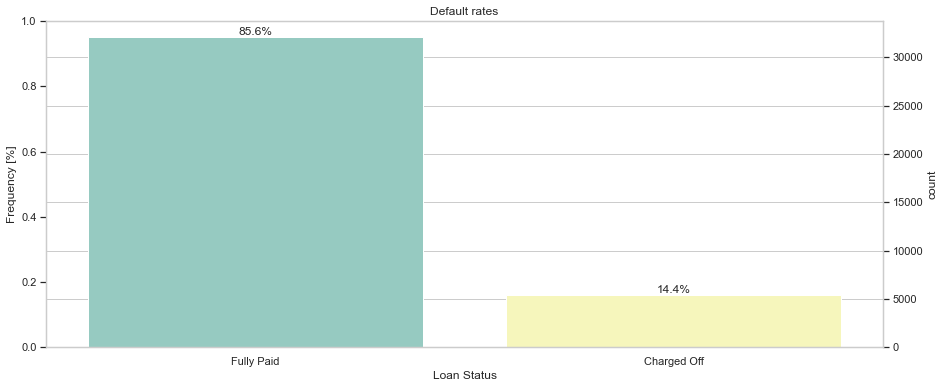

In [121]:
bar_plt("loan_status",loan_default_df,'Loan Status','Default rates')

**As per our derived variable "job rank", we have 42.6% defaults belong to customers under "Entry Level" or having experience less than <=3years**

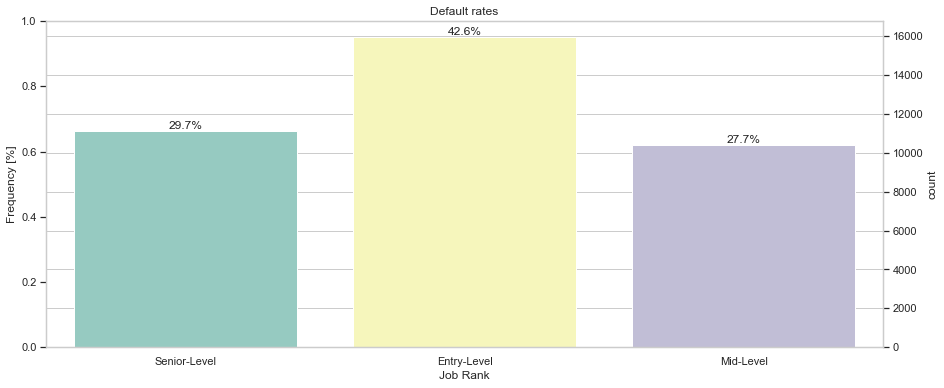

In [205]:
bar_plt("job_rank",loan_default_df,'Job Rank','Default rates')

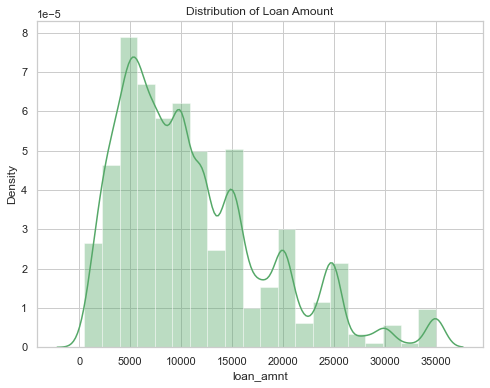

In [123]:
plt.figure(figsize=(8,6))
sns.distplot(loan_default_df.loan_amnt, bins=20, color ='g')
plt.title("Distribution of Loan Amount", fontsize=12)
plt.show()

In [124]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ab, d=None):
    plt.margins(0.2, 0.2)
    rects = ab.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.""

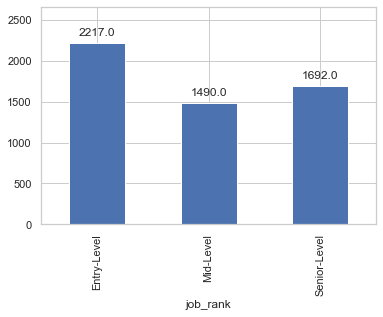

In [125]:
charged_off_df = loan_default_df.loc[loan_default_df['loan_status']=='Charged Off']

job_rank_analysis = charged_off_df.groupby(charged_off_df.job_rank)['loan_status'].count().plot.bar()
showLabels(job_rank_analysis)
plt.show()

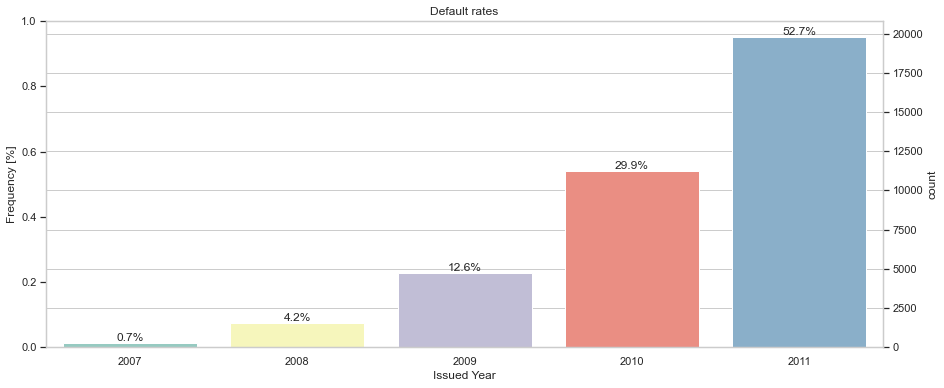

In [162]:
bar_plt("issue_year",loan_default_df,'Issued Year','Default rates')

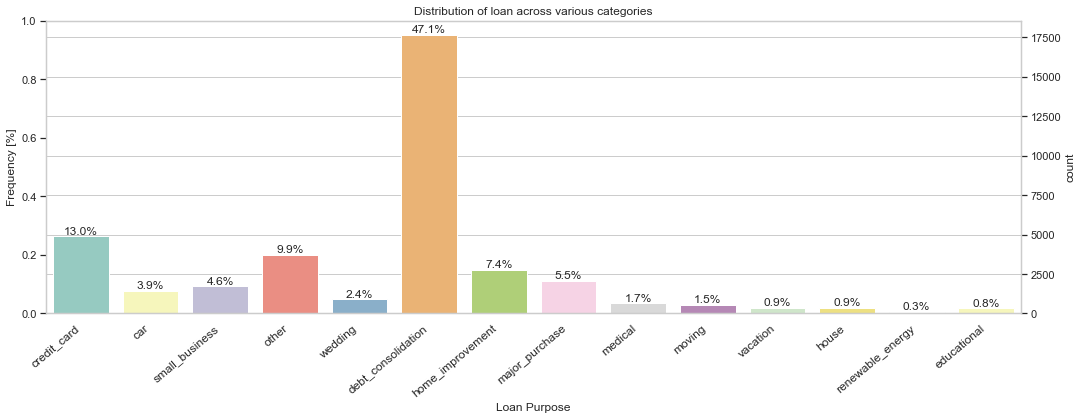

In [127]:
bar_plt("purpose",loan_default_df,'Loan Purpose','Distribution of loan across various categories',None,1)

# Bivariate Analysis

**From below chart we deduce that most of the defaulter's verification status in not verified.So we need to expedite the process of verification and then only loan should be given**

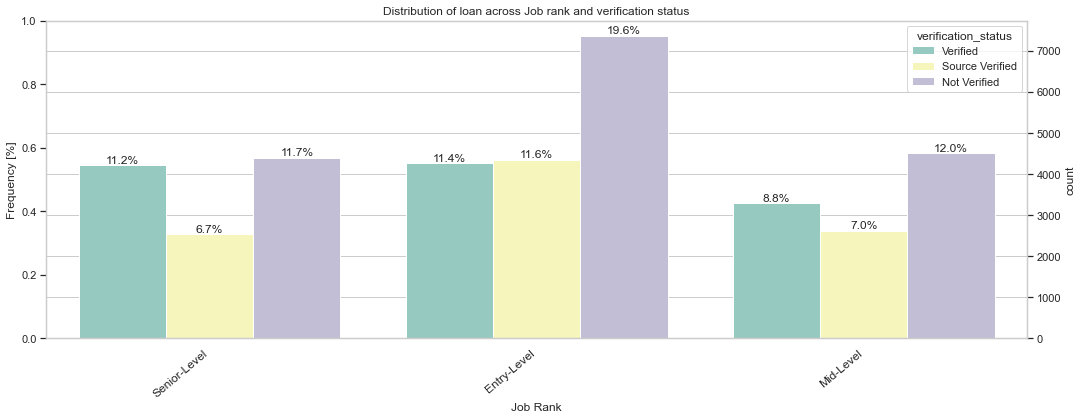

In [206]:
bar_plt("job_rank",loan_default_df,'Job Rank','Distribution of loan across Job rank and verification status','verification_status',1)

**Below graph is interesting.Grades tell us the credibility of a customer which means Grade A is better than Grade B and so on.
But in below graph Grade B and C are having comparitively high Default ratio** 

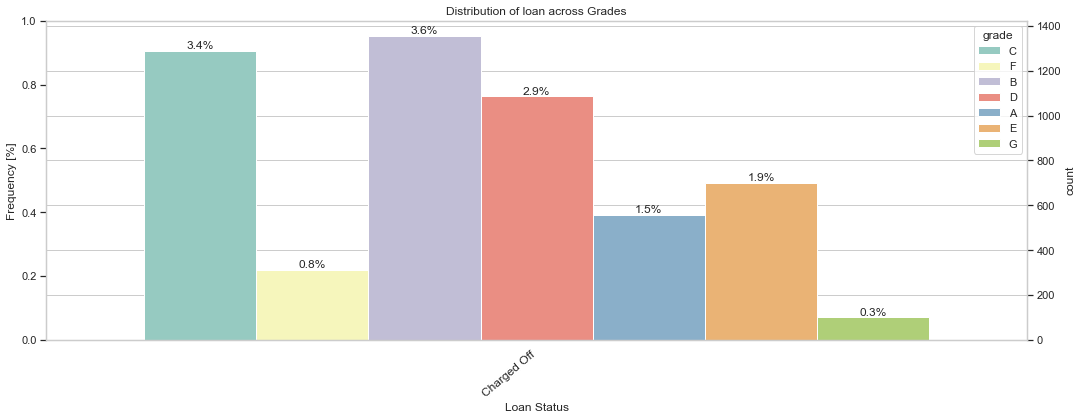

In [135]:

bar_plt("loan_status",charged_off_df,'Loan Status','Distribution of loan across Grades','grade',1)

**Below chart tells us most of the customers who are having experience <=3years stay in Rental house and mostly applies for loan.**

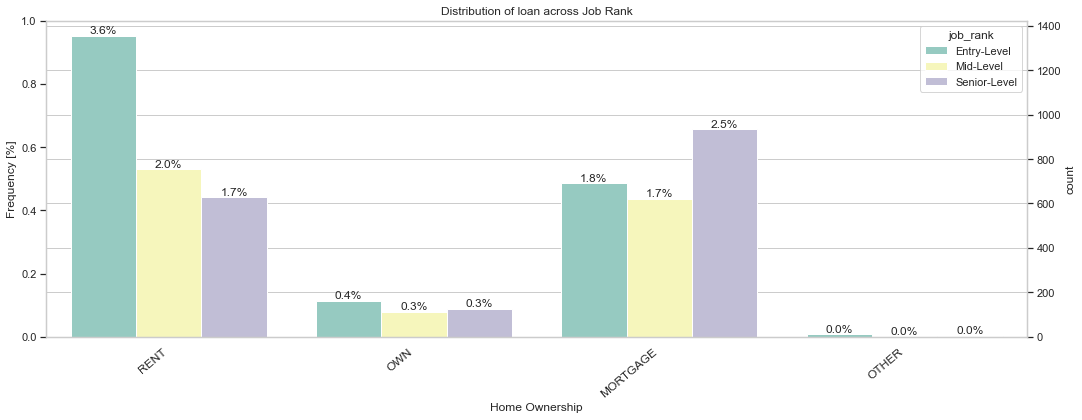

In [207]:

bar_plt("home_ownership",charged_off_df,'Home Ownership','Distribution of loan across Job Rank','job_rank',1)

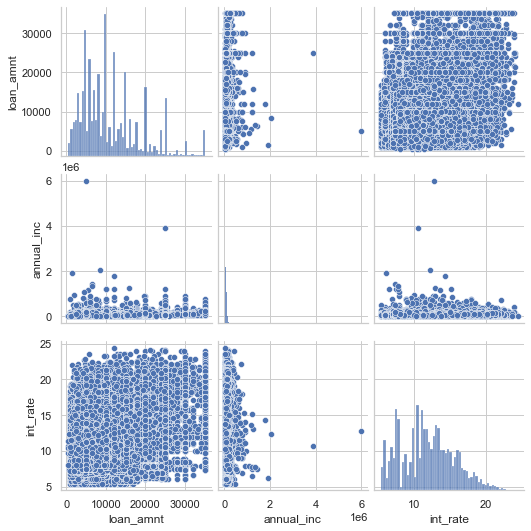

In [138]:
sns.pairplot(loan_default_df[['loan_amnt','annual_inc','int_rate']])

**We can see in the below box plot, spread of loan_amt is more with defaulted customers** 

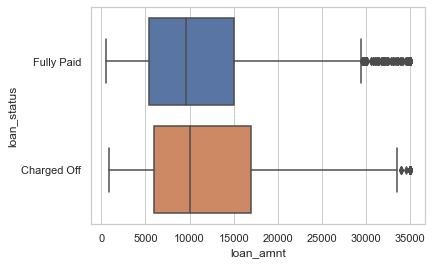

In [140]:

sns.boxplot(data=loan_default_df, x=loan_default_df.loan_amnt, y=loan_default_df['loan_status'] )
plt.show()

### Debt to Income metric is one of the important metric to understand loan application acceptance.If dti is higher then chance of rejection is higher and vice versa
**Lets do analysis on DTI**

Assumption :
    dti is available in our dataset, we dont need to calculate from the scratch.Instead we can create a categorical variable
    <br>
    dti <= 10% -- Conservative Risk
    <br>
    dti > 10 and dti <= 20 -- Moderate Risk
    <br>
    dti > 20 -- Higher Risk

In [265]:
def dti_ranges(dti):
    if dti <= 10.00:
        return 'Conservative Risk'
    elif dti > 10.00 and dti <= 20.00:
        return 'Moderate Risk'
    else:
        return 'Higher Risk'
    
loan_default_df['dti_ranges'] = loan_default_df.dti.apply(lambda x:dti_ranges(x))

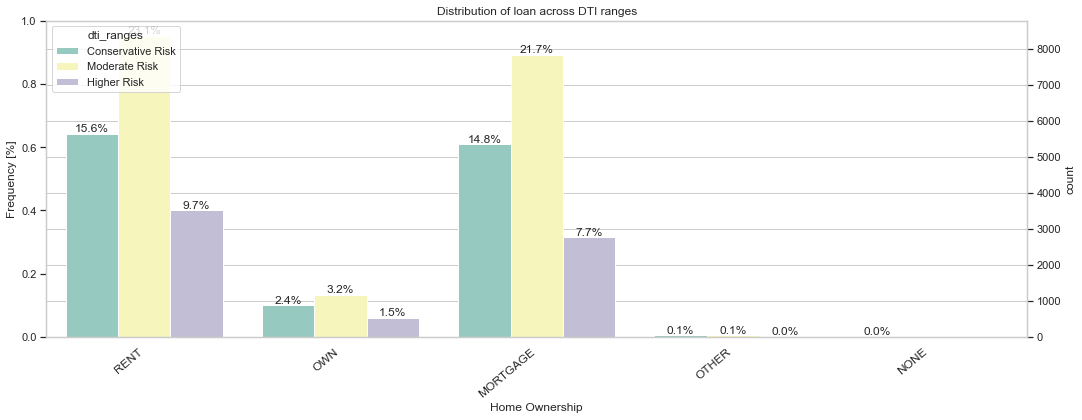

In [266]:
bar_plt("home_ownership",loan_default_df,'Home Ownership','Distribution of loan across DTI ranges','dti_ranges',1)

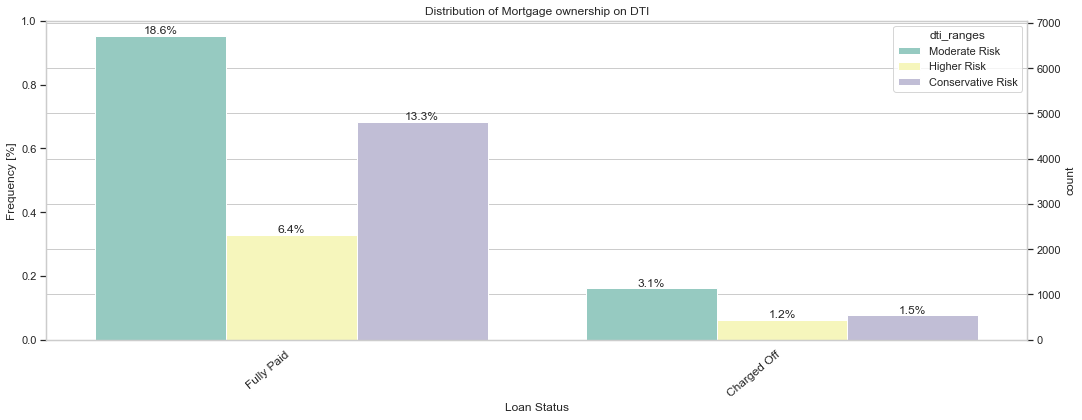

In [269]:
mortgage_df = loan_default_df[loan_default_df.home_ownership=='MORTGAGE']
bar_plt("loan_status",mortgage_df,'Loan Status','Distribution of Mortgage ownership on DTI','dti_ranges',1)

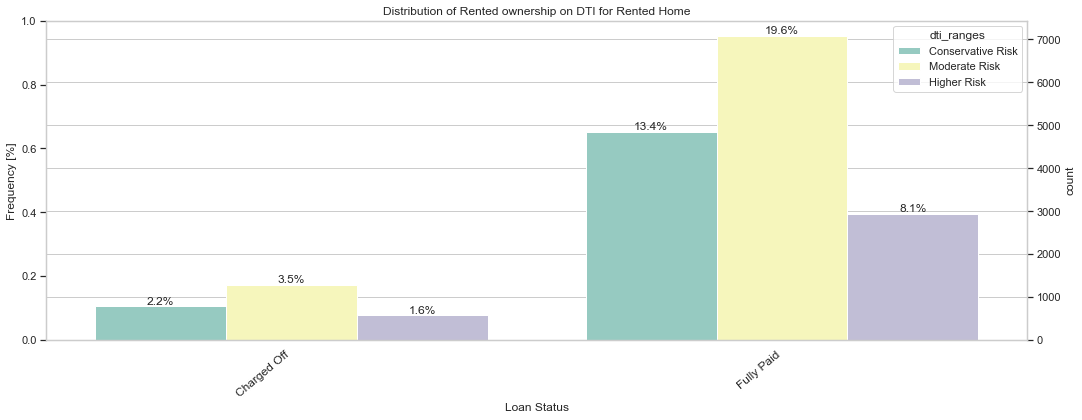

In [268]:
rent_df = loan_default_df[loan_default_df.home_ownership=='RENT']
bar_plt("loan_status",rent_df,'Loan Status','Distribution of Rented ownership on DTI for Rented Home','dti_ranges',1)

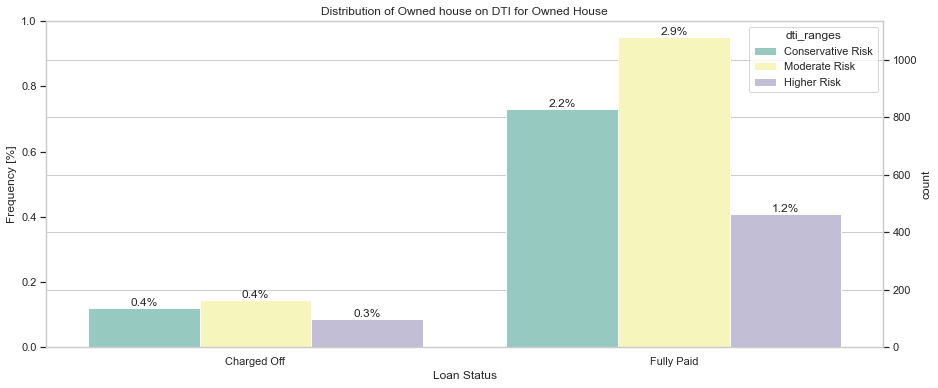

In [215]:
owned_df = loan_default_df[loan_default_df.home_ownership=='OWN']
bar_plt("loan_status",owned_df,'Loan Status','Distribution of Owned house on DTI for Owned House','dti_ranges')
plt.show()

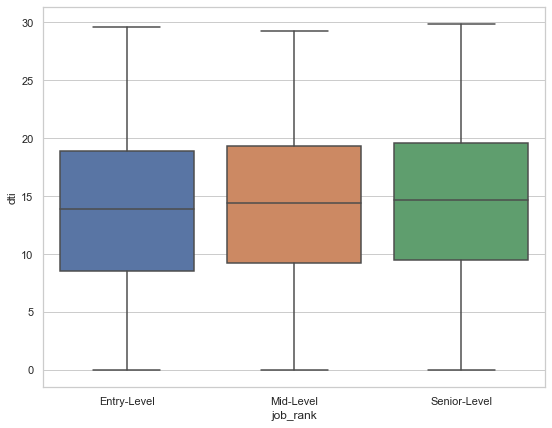

In [214]:
charged_off_dti_df = loan_default_df[loan_default_df.loan_status=='Charged Off']
plt.figure(figsize=[9,7])
sns.boxplot(charged_off_dti_df.job_rank, loan_default_df.dti)
plt.show()

Variable - emp_title
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [261]:
emp_top10 = loan_default_df.emp_title.value_counts().head(10)

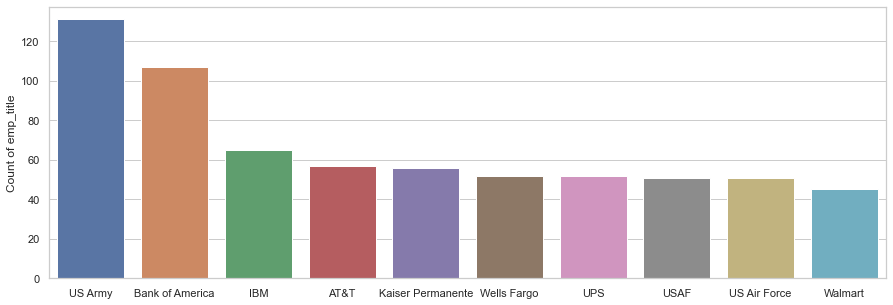

In [263]:
plt.figure(figsize=(15,5))
a=sns.barplot(x=emp_top10.index, y=emp_top10.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation:**
<br>
Max of the customers are from the US Army, Bank of America followed by IBM and AT&T.
<br>
Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.


### Comparative Analysis
**Side by side comparison of entire dataset vs Charged off/defaults dataset**

In [194]:
#Below method prints 2 plots side by side, left plot reprsents % of a categorical variable in the entire dataset and right plot represnts % of defaulters

def dual_plot_ratio(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan_default_df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ab = values.plot.bar(color=sns.color_palette("hls", 8))
    ab.set_ylabel('% in entire dataset', fontsize=16)
    ab.set_xlabel(by, fontsize=12)
    showLabels(ab)
    plt.subplot(1, 2, 2)
    values = (loan_default_df.loc[loan_default_df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ab = values.plot.bar(color=sns.color_palette("hls", 8))
    ab.set_ylabel('% in Charged Off dataset', fontsize=16)
    showLabels(ab)

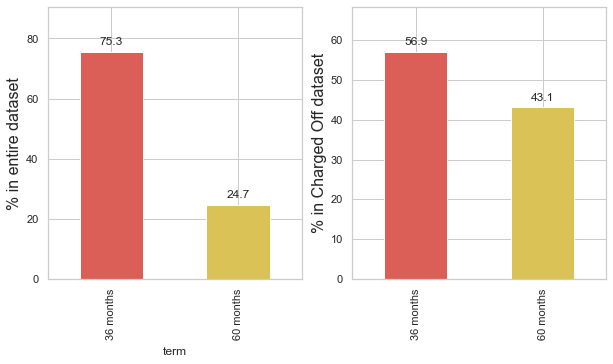

In [195]:
plt.figure(figsize=(10,5))
dual_plot_ratio(loan_default_df, 'term')

**Observation** : More than half of the defaulters opt for 3 years loan term. 

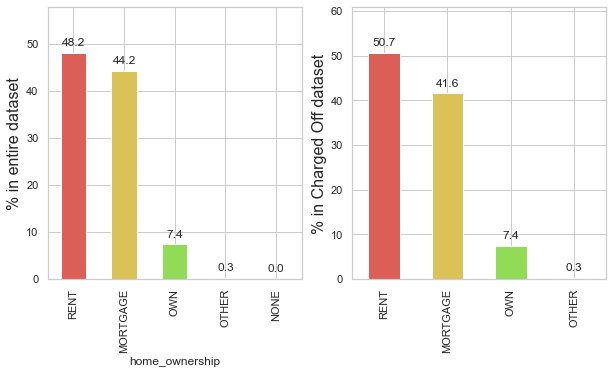

In [196]:
plt.figure(figsize=(10,5))
dual_plot_ratio(loan_default_df, 'home_ownership')

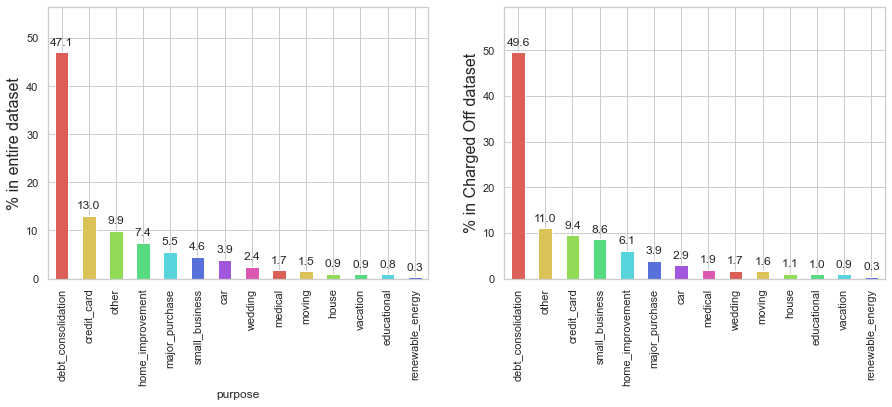

In [199]:
plt.figure(figsize=(15,5))
dual_plot_ratio(loan_default_df, 'purpose')

**Observation** : 
    <br>
    1.In both datasets, 'debt_consolidation' category is leading.
    <br>
    2.'small_business' category almost doubled in case of 'Charged off' datasets.

### Below is the analysis on corelation between different variables

In [202]:
loan_correlation_df = loan_default_df.filter(["loan_amnt","annual_inc","dti","int_rate","installment"]) 
loan_correlation_df.corr()

,loan_amnt,annual_inc,dti,int_rate,installment
loan_amnt,1.000000,0.266282,0.061402,0.299237,0.931686
annual_inc,0.266282,1.000000,-0.123582,0.046092,0.264684
dti,0.061402,-0.123582,1.000000,0.112188,0.050727
int_rate,0.299237,0.046092,0.112188,1.000000,0.274791
installment,0.931686,0.264684,0.050727,0.274791,1.000000


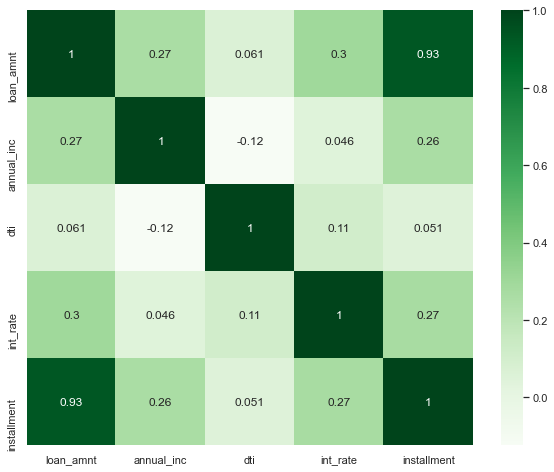

In [204]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(loan_correlation_df.corr(), cmap="Greens", annot=True)
plt.show()